## Meditation and Relaxation Music Recommendation system

## Team 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.neighbors import NearestNeighbors

In [2]:
# pip install fuzzywuzzy
from fuzzywuzzy import process

D:\Anaconda\Anaconda\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


##### Loading the dataset/Reading the file
##### We have used last.fm, a freely available collection of songs for meditation and relaxation 
##### We have used 2 data set. Triplets file consists of user id, song id and listen count. Metadeta file consist ofsong id, track name/title, artist name, type and album

In [3]:
song_df_1 = pd.read_csv('triplets_file.csv')
song_df_1.head()

,User id,Song_id,Listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S1,272
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S2,130
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S3,120
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S4,105
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S5,94


In [4]:
song_df_1.rename(columns={'User id':'User_id'},inplace=True)

In [5]:
song_df_1.head()

,User_id,Song_id,Listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S1,272
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S2,130
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S3,120
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S4,105
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S5,94


In [6]:
song_df_2 = pd.read_csv('song_data.csv')
song_df_2.head()

,Song_id,Title,Artist_name,Type,Album Link
0,S1,Spirales,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Spirales
1,S2,Lovesong from the Mountains,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Lovesong+fr...
2,S3,Kindred Spirit,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Kindred+Spirit
3,S4,Temple of Silence,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Temple+of+S...
4,S5,Hands Of Love,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Hands+Of+Love


###### Song_id are the common key . if we want to combine anything we can use this common key to combine it 
###### Combining both the data into a single dataframe 
###### song_df_2 info can be used to get some keywords to get some related songs for content based . For collaberative we can use users history of song_df_1 and give some recommendation 

In [7]:
song_df=pd.merge(song_df_1,song_df_2, on='Song_id', how='left') 
song_df.tail()

,User_id,Song_id,Listen_count,Title,Artist_name,Type,Album Link
1088,a1380d458c15706b9d5282304db81a5a78352e96,S1089,7,Light Wings,World of Osho,Meditation and relaxation,https://www.last.fm/music/Music+from+the+World...
1089,405d396ea64d75b5eaefaaf8ac836f45fa56af4d,S1090,8,Witchi Tai Tai,World of Osho,Meditation and relaxation,https://www.last.fm/music/Music+from+the+World...
1090,405d396ea64d75b5eaefaaf8ac836f45fa56af4d,S1091,9,Like The Wind,World of Osho,Meditation and relaxation,https://www.last.fm/music/Music+from+the+World...
1091,405d396ea64d75b5eaefaaf8ac836f45fa56af4d,S1092,10,"Wenn Du Nach Anderen Blickst, Um Erfüllt Zu We...",World of Osho,Meditation and relaxation,https://www.last.fm/music/Music+from+the+World...
1092,405d396ea64d75b5eaefaaf8ac836f45fa56af4d,S1093,11,Synchronicity,World of Osho,Meditation and relaxation,https://www.last.fm/music/Music+from+the+World...


In [8]:
print(len(song_df_1),len(song_df_2))

1093 1091


###### Data Exploration and Cleaning - The first step in any analysis should start with data understanding and this can be done with EDA process. 
###### Before we dive into data visualizations, lets get a look on the descriptive statistics from the Music Data set.

In [9]:
song_df.shape 

(1093, 7)

In [10]:
song_df.describe()  

,Listen_count
count,1093.000000
mean,5.469350
std,14.053151
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,272.000000


In [11]:
song_df.describe(include='all')

,User_id,Song_id,Listen_count,Title,Artist_name,Type,Album Link
count,1093,1093,1093.000000,1091,1091,1091,1091
unique,26,1093,NaN,1046,6,1,1049
top,5a905f000fc1ff3df7ca807d57edb608863db05d,S1,NaN,Variation on Genesis,Ravi Shankar,Meditation and relaxation,https://www.last.fm/music/Ravi+Shankar/_/Jaane...
freq,401,1,NaN,2,425,1091,2
mean,NaN,NaN,5.469350,NaN,NaN,NaN,NaN
std,NaN,NaN,14.053151,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [12]:
song_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 0 to 1092
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_id       1093 non-null   object
 1   Song_id       1093 non-null   object
 2   Listen_count  1093 non-null   int64 
 3   Title         1091 non-null   object
 4   Artist_name   1091 non-null   object
 5   Type          1091 non-null   object
 6   Album Link    1091 non-null   object
dtypes: int64(1), object(6)
memory usage: 68.3+ KB


In [13]:
song_df.dtypes

User_id         object
Song_id         object
Listen_count     int64
Title           object
Artist_name     object
Type            object
Album Link      object
dtype: object

In [14]:
song_df.isnull().sum() 

User_id         0
Song_id         0
Listen_count    0
Title           2
Artist_name     2
Type            2
Album Link      2
dtype: int64

###### Exploring some charecteristics of the data 

In [15]:
song_df.nunique()  

User_id           26
Song_id         1093
Listen_count      55
Title           1046
Artist_name        6
Type               1
Album Link      1049
dtype: int64

In [16]:
print(song_df['Artist_name'].unique()) 

['Deuter' 'Krishna Das' 'Ephemeral Mists' 'Ravi Shankar' nan 'Snatam Kaur'
 'World of Osho']


In [17]:
song_df['Artist_name'].nunique()  

6

In [18]:
song_df['User_id'].unique()  

array(['b80344d063b5ccb3212f76538f3d9e43d87dca9e',
       '85c1f87fea955d09b4bec2e36aee110927aedf9a',
       'bd4c6e843f00bd476847fb75c47b4fb430a06856',
       '8937134734f869debcab8f23d77465b4caaa85df',
       '969cc6fb74e076a68e36a04409cb9d3765757508',
       '4bd88bfb25263a75bbdd467e74018f4ae570e5df',
       'e006b1a48f466bf59feefed32bec6494495a4436',
       '9d6f0ead607ac2a6c2460e4d14fb439a146b7dec',
       '9bb911319fbc04f01755814cb5edb21df3d1a336',
       'b64cdd1a0bd907e5e00b39e345194768e330d652',
       '17aa9f6dbdf753831da8f38c71b66b64373de613',
       'd6589314c0a9bcbca4fee0c93b14bc402363afea',
       '5a905f000fc1ff3df7ca807d57edb608863db05d',
       'c737ec8c1b16ce8e39115f4432c9a7fc21ec47a1',
       '45544491ccfcdc0b0803c34f201a6287ed4e30f8',
       'ed7d4c476013b1c3dd91982b61494bf7436083ba',
       'baf47ed8da24d607e50d8684cde78b923538640f',
       '169f9f4c68b62d1887c7c0ac99d10a79cfca5daf',
       'a820d2d4f16bbd53be9e41e0417dfb234bfdfba8',
       'bd8475385f0aa78830fa6df

In [19]:
song_df['User_id'].nunique() 

26

In [20]:
song_df['Song_id'].unique() 

array(['S1', 'S2', 'S3', ..., 'S1091', 'S1092', 'S1093'], dtype=object)

In [21]:
song_df['Song_id'].nunique() 

1093

###### For creating key words we are combining Title and artist name. We create a single song key word.

In [22]:
song_df['song']=song_df['Title']+'-'+song_df['Artist_name']
song_df.head()

,User_id,Song_id,Listen_count,Title,Artist_name,Type,Album Link,song
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S1,272,Spirales,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Spirales,Spirales-Deuter
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S2,130,Lovesong from the Mountains,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Lovesong+fr...,Lovesong from the Mountains-Deuter
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S3,120,Kindred Spirit,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Kindred+Spirit,Kindred Spirit-Deuter
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S4,105,Temple of Silence,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Temple+of+S...,Temple of Silence-Deuter
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S5,94,Hands Of Love,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Hands+Of+Love,Hands Of Love-Deuter


In [23]:
song_grouped = song_df.groupby(['User_id']).agg({'Listen_count':'sum'}).reset_index()
song_grouped.head() 

,User_id,Listen_count
0,0afaa5d9d04bf85af720fe8cc566a41ca3e41c97,30
1,169f9f4c68b62d1887c7c0ac99d10a79cfca5daf,32
2,17aa9f6dbdf753831da8f38c71b66b64373de613,150
3,403b3b867fc71dfdcc12652f30e88bdc7ccd9aa4,15
4,405d396ea64d75b5eaefaaf8ac836f45fa56af4d,38


In [24]:
song_grouped = song_df.groupby(['song']).agg({'Listen_count':'sum'}).reset_index()
song_grouped.head()

,song,Listen_count
0,11. Nirvana Road (Дорога в нирвану)-Deuter,1
1,4AM Hanuman Chalisa-Krishna Das,13
2,Aad Guray Nameh (Protection of the Heart)-Snat...,2
3,Aad Guray Nameh (Protection)-Snatam Kaur,25
4,Aad Guray Nameh - Live-Snatam Kaur,6


In [25]:
grouped_sum = song_grouped['Listen_count'].sum()

In [26]:
song_grouped['percentage'] = song_grouped['Listen_count'] / grouped_sum * 100 

In [27]:
song_df_1.sort_values(['Listen_count','User_id'], ascending=[0,1])

,User_id,Song_id,Listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S1,272
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S2,130
927,bd8475385f0aa78830fa6dfce9e7242164b035c8,S928,124
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S3,120
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S4,105
...,...,...,...
1075,f84f5b5a5c5d1d9fb4866f6488e0d2661b54c192,S1076,1
1076,f84f5b5a5c5d1d9fb4866f6488e0d2661b54c192,S1077,1
1077,f84f5b5a5c5d1d9fb4866f6488e0d2661b54c192,S1078,1
1078,f84f5b5a5c5d1d9fb4866f6488e0d2661b54c192,S1079,1


###### So above the highest listen count is 401 for user id 5a905f000fc1ff3df7ca807d57edb608863db05d and the % is calculated correspondingly 

In [28]:
grouped_sum = song_grouped['Listen_count'].sum()   

In [29]:
song_grouped['percentage'] = (song_grouped['Listen_count'] / grouped_sum) * 100 

In [30]:
song_grouped.sort_values(['Listen_count','song'], ascending=[0,1])    

,song,Listen_count,percentage
865,Spirales-Deuter,272,4.554588
443,Lovesong from the Mountains-Deuter,130,2.176825
516,Mul Mantra-Snatam Kaur,124,2.076356
407,Kindred Spirit-Deuter,120,2.009377
927,Temple of Silence-Deuter,105,1.758205
...,...,...,...
1038,allah rocking-Ravi Shankar,1,0.016745
1039,instrumental 2-Ravi Shankar,1,0.016745
1042,loving a buddha-Deuter,1,0.016745
1044,source-Deuter,1,0.016745


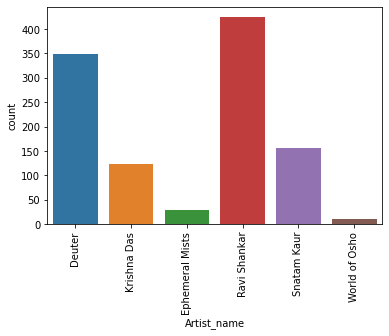

In [31]:
sns.countplot('Artist_name', data=song_df)
plt.xticks(rotation=90)
plt.show()

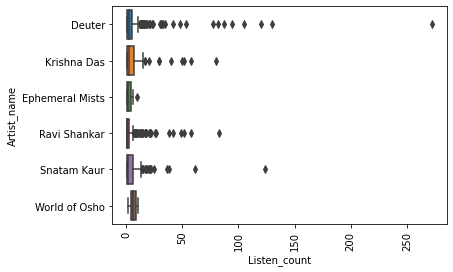

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot( x="Listen_count", y='Artist_name', data=song_df)
plt.xticks(rotation=90)
plt.show()

###### Most popular songs
###### How do we determine which are the most popular songs? For this task, we'll count how many times each song appears. Note that while we are using listen_count, we only care about the number of rows, we don't consider the number present in that row. This number represents how many times one user listen to the same song.
###### count how many rows we have by song, we show only the five more popular songs 

In [33]:
five_pop_songs = song_df.groupby('Title')['Listen_count'].count().reset_index().sort_values(['Listen_count', 'Title'], ascending = [0,1])

In [34]:
five_pop_songs['percentage']  = round(five_pop_songs['Listen_count'].div(five_pop_songs['Listen_count'].sum())*100, 2)

In [35]:
five_pop_songs = five_pop_songs[:5]
five_pop_songs

,Title,Listen_count,percentage
57,Badal Dekh Dari,2,0.18
108,Charly Theme and Resolution,2,0.18
136,Concerto for Sitar and Orchestra: III. Raga Adana,2,0.18
164,Der Turm/Fluchpunkt,2,0.18
178,Dhun (Folk Airs) (Remastered),2,0.18


In [36]:
labels = five_pop_songs['Title'].tolist()
counts = five_pop_songs['Listen_count'].tolist()

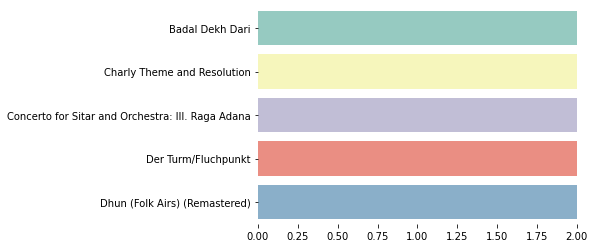

In [37]:
plt.figure()
sns.barplot(x=counts, y=labels, palette='Set3')
sns.despine(left=True, bottom=True)

###### Most popular artist
###### The next task, we'll count how many times each artist appears. Again, we'll count how many times the same artist appears.

In [38]:
five_pop_artists  = song_df.groupby(['Artist_name'])['Listen_count'].count().reset_index().sort_values(['Listen_count', 'Artist_name'],ascending = [0,1])

In [39]:
five_pop_artists = five_pop_artists[:5]
five_pop_artists

,Artist_name,Listen_count
3,Ravi Shankar,425
0,Deuter,349
4,Snatam Kaur,155
2,Krishna Das,124
1,Ephemeral Mists,28


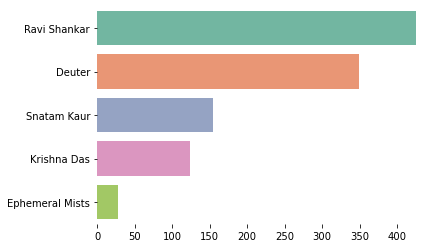

In [40]:
plt.figure()
labels = five_pop_artists['Artist_name'].tolist()
counts = five_pop_artists['Listen_count'].tolist()
sns.barplot(x=counts, y=labels, palette='Set2')
sns.despine(left=True, bottom=True)

###### Listen count by user
###### We can also get some other information from the feature listen_count. We will answer the folloging questions:
###### What was the maximum time the same user listen to a same song?

In [41]:
Listen_counts = pd.DataFrame(song_df.groupby('Listen_count').size(), columns=['count'])

In [42]:
print(f"The maximum time the same user listened to the same songs was: {Listen_counts.reset_index(drop=False)['Listen_count'].iloc[-1]}")

The maximum time the same user listened to the same songs was: 272


###### How many times on average the same user listen to a same song?

In [43]:
print(f"On average, a user listen to the same song {song_df['Listen_count'].mean()} times")

On average, a user listen to the same song 5.469350411710887 times


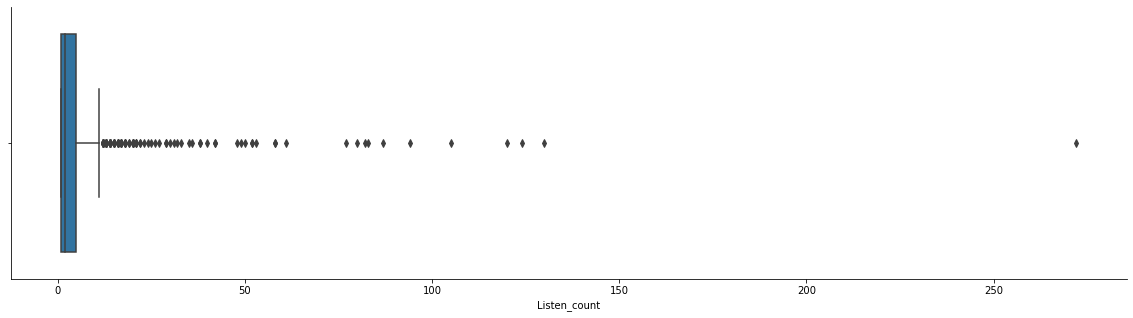

In [44]:
plt.figure(figsize=(20, 5))
sns.boxplot(x='Listen_count', data=song_df)
sns.despine()

###### What are the most frequent number of times a user listen to the same song?

In [45]:
Listen_counts_temp = Listen_counts[Listen_counts['count'] > 50].reset_index(drop=False)

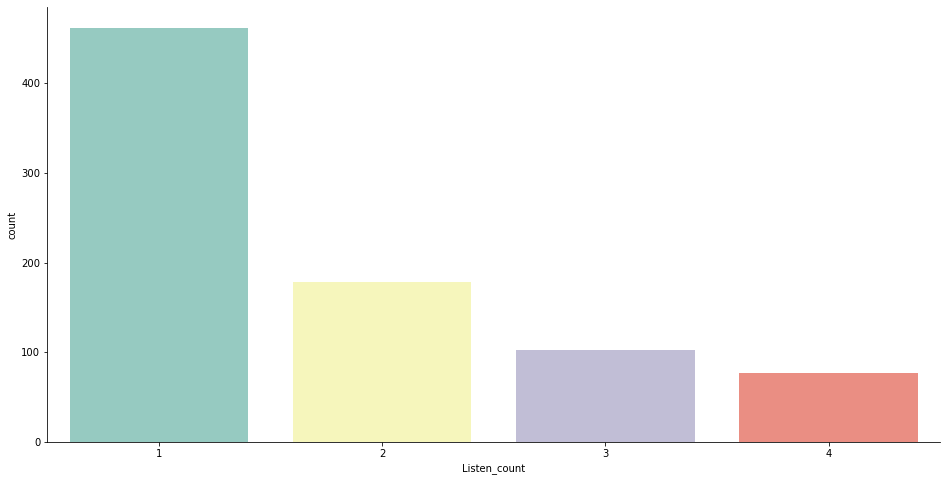

In [46]:
plt.figure(figsize=(16, 8))
sns.barplot(x='Listen_count', y='count', palette='Set3', data=Listen_counts_temp)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

###### How many songs does a user listen in average?

In [47]:
song_user = song_df.groupby('User_id')['Song_id'].count()

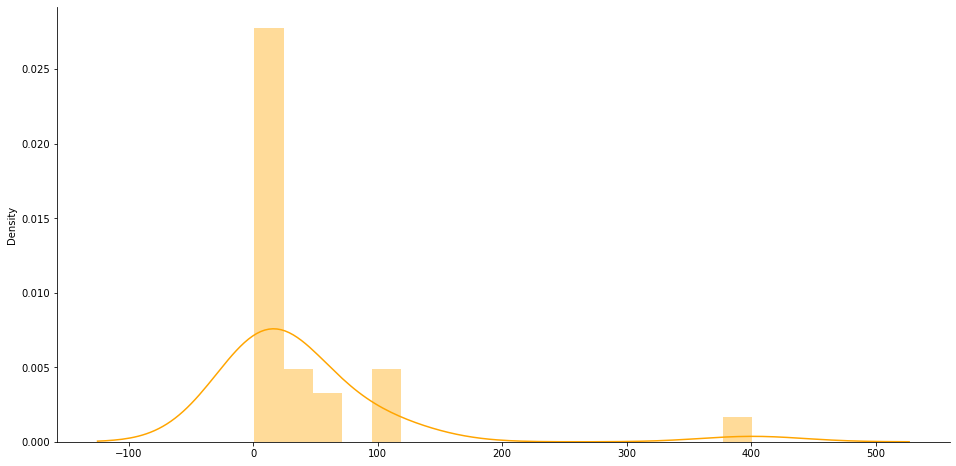

In [48]:
plt.figure(figsize=(16, 8))
sns.distplot(song_user.values, color='orange')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

In [49]:
print(f"A user listens to an average of {np.mean(song_user)} songs")

A user listens to an average of 42.03846153846154 songs


In [50]:
print(f"A user listens to an average of {np.median(song_user)} songs, with minimum {np.min(song_user)} and maximum {np.max(song_user)} songs")

A user listens to an average of 14.0 songs, with minimum 1 and maximum 401 songs


###### We can see that a user listens in average to 41.5 songs. Even the maximum amount of songs listen by an user is 395, and we have 1079 songs in our dataset.
###### So, not all user listen to all songs, so a lot of values in the song x users matrix are going to be zero. Thus, we’ll be dealing with extremely sparse data.
###### How sparse? Let's check that:
###### Get how many values should it be if all songs have been listen by all users. # Substract the total values with the actural shape of the DataFrame songs

## KNN 1

In [51]:
#Spare Matrix

from scipy.sparse import csr_matrix

In [52]:
#pivot

music_users_features = song_df.pivot(index='Song_id', columns='User_id', values='Listen_count').fillna(0)

In [53]:
# convert dataframe of movie features to scipy sparse matrix

mat_music_users=csr_matrix(music_users_features.values)
music_users_features

User_id,0afaa5d9d04bf85af720fe8cc566a41ca3e41c97,169f9f4c68b62d1887c7c0ac99d10a79cfca5daf,17aa9f6dbdf753831da8f38c71b66b64373de613,403b3b867fc71dfdcc12652f30e88bdc7ccd9aa4,405d396ea64d75b5eaefaaf8ac836f45fa56af4d,45544491ccfcdc0b0803c34f201a6287ed4e30f8,4bd88bfb25263a75bbdd467e74018f4ae570e5df,5a905f000fc1ff3df7ca807d57edb608863db05d,81bde1c3a845c64f1677bd9d28f2da85dfefcf30,85c1f87fea955d09b4bec2e36aee110927aedf9a,...,b64cdd1a0bd907e5e00b39e345194768e330d652,b80344d063b5ccb3212f76538f3d9e43d87dca9e,baf47ed8da24d607e50d8684cde78b923538640f,bd4c6e843f00bd476847fb75c47b4fb430a06856,bd8475385f0aa78830fa6dfce9e7242164b035c8,c737ec8c1b16ce8e39115f4432c9a7fc21ec47a1,d6589314c0a9bcbca4fee0c93b14bc402363afea,e006b1a48f466bf59feefed32bec6494495a4436,ed7d4c476013b1c3dd91982b61494bf7436083ba,f84f5b5a5c5d1d9fb4866f6488e0d2661b54c192
Song_id,,,,,,,,,,,,,,,,,,,,,
S1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,272.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
S1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
S1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
S996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
S997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0


###### Dealing with such a sparse matrix, we'll take a lot of memory and resources. To make our life easier, let's just select all those users that have listened to at least 16 songs.
###### Model recommendations
###### So, we know that we want to use the model to predict songs. For that, we'll use the Recommender class wrote in the knn_recommender file.
###### Using cosine similarity

In [54]:
from sklearn.neighbors import NearestNeighbors

In [55]:
model_knn=NearestNeighbors(metric='cosine',algorithm='brute',n_neighbors=20)

In [56]:
model_knn.fit(mat_music_users)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=20)

In [57]:
# Recommender (music_name) => List of Music

def recommender(music_name,data,model,n_recommendations):
    model.fit(data)
    index=process.extractOne(music_name,song_df['Title'])[2]
    print('Music Selected:',song_df['Title'][index],'Index:',index)
    print('Searching for recommendation......')
    distances,indices=model.kneighbors(data[index],n_neighbors=n_recommendations)
    for i in indices:
        print(song_df['Title'][i].where(i!=index))
recommender('Synchronicity',mat_music_users,model_knn,10)

Music Selected: Synchronicity Index: 1092
Searching for recommendation......
1033                                         Ek Ong Kar
1032                              Ek Ong Kaar (Destiny)
1037                                       Ardas Bhayee
1036                                 Pritham Bhagaautee
1035                                Suni-ai Celebration
1034                                     People of Love
1039                               Har Har Ram Das Guru
1028    Hallelujah - Live at Sat Nam Fest - August 2011
1002                                            Crimson
1041                             Guru Ram Das (Healing)
Name: Title, dtype: object


# KNN 2

In [58]:
import pandas as pd
import numpy as np

In [59]:
songs = pd.read_csv('song_data.csv')
songs.head()

,Song_id,Title,Artist_name,Type,Album Link
0,S1,Spirales,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Spirales
1,S2,Lovesong from the Mountains,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Lovesong+fr...
2,S3,Kindred Spirit,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Kindred+Spirit
3,S4,Temple of Silence,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Temple+of+S...
4,S5,Hands Of Love,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Hands+Of+Love


In [60]:
songs.shape

(1091, 5)

In [61]:
users = pd.read_csv('triplets_file.csv')
users.head()

,User id,Song_id,Listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S1,272
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S2,130
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S3,120
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S4,105
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S5,94


In [62]:
users.shape

(1093, 3)

In [63]:
users['User id'].value_counts()

5a905f000fc1ff3df7ca807d57edb608863db05d    401
bd8475385f0aa78830fa6dfce9e7242164b035c8    118
17aa9f6dbdf753831da8f38c71b66b64373de613    103
baf47ed8da24d607e50d8684cde78b923538640f    100
b64cdd1a0bd907e5e00b39e345194768e330d652     66
d6589314c0a9bcbca4fee0c93b14bc402363afea     52
b80344d063b5ccb3212f76538f3d9e43d87dca9e     45
169f9f4c68b62d1887c7c0ac99d10a79cfca5daf     32
e006b1a48f466bf59feefed32bec6494495a4436     25
f84f5b5a5c5d1d9fb4866f6488e0d2661b54c192     22
0afaa5d9d04bf85af720fe8cc566a41ca3e41c97     20
969cc6fb74e076a68e36a04409cb9d3765757508     19
403b3b867fc71dfdcc12652f30e88bdc7ccd9aa4     15
4bd88bfb25263a75bbdd467e74018f4ae570e5df     13
9d6f0ead607ac2a6c2460e4d14fb439a146b7dec     11
a1380d458c15706b9d5282304db81a5a78352e96      9
bd4c6e843f00bd476847fb75c47b4fb430a06856      8
a820d2d4f16bbd53be9e41e0417dfb234bfdfba8      6
c737ec8c1b16ce8e39115f4432c9a7fc21ec47a1      6
9bb911319fbc04f01755814cb5edb21df3d1a336      6
45544491ccfcdc0b0803c34f201a6287ed4e30f8

In [64]:
users.nunique()

User id           26
Song_id         1093
Listen_count      55
dtype: int64

In [65]:
x = users['User id'].value_counts()>5
x[x].shape

(20,)

In [66]:
y = x[x].index
y

Index(['5a905f000fc1ff3df7ca807d57edb608863db05d',
       'bd8475385f0aa78830fa6dfce9e7242164b035c8',
       '17aa9f6dbdf753831da8f38c71b66b64373de613',
       'baf47ed8da24d607e50d8684cde78b923538640f',
       'b64cdd1a0bd907e5e00b39e345194768e330d652',
       'd6589314c0a9bcbca4fee0c93b14bc402363afea',
       'b80344d063b5ccb3212f76538f3d9e43d87dca9e',
       '169f9f4c68b62d1887c7c0ac99d10a79cfca5daf',
       'e006b1a48f466bf59feefed32bec6494495a4436',
       'f84f5b5a5c5d1d9fb4866f6488e0d2661b54c192',
       '0afaa5d9d04bf85af720fe8cc566a41ca3e41c97',
       '969cc6fb74e076a68e36a04409cb9d3765757508',
       '403b3b867fc71dfdcc12652f30e88bdc7ccd9aa4',
       '4bd88bfb25263a75bbdd467e74018f4ae570e5df',
       '9d6f0ead607ac2a6c2460e4d14fb439a146b7dec',
       'a1380d458c15706b9d5282304db81a5a78352e96',
       'bd4c6e843f00bd476847fb75c47b4fb430a06856',
       'a820d2d4f16bbd53be9e41e0417dfb234bfdfba8',
       'c737ec8c1b16ce8e39115f4432c9a7fc21ec47a1',
       '9bb911319fbc04f01755814

In [67]:
users = users[users['User id'].isin(y)]

In [68]:
users.head()

,User id,Song_id,Listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S1,272
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S2,130
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S3,120
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S4,105
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S5,94


In [69]:
song_users = pd.merge(users,songs,on='Song_id')

In [70]:
song_users.head()

,User id,Song_id,Listen_count,Title,Artist_name,Type,Album Link
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S1,272,Spirales,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Spirales
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S2,130,Lovesong from the Mountains,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Lovesong+fr...
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S3,120,Kindred Spirit,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Kindred+Spirit
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S4,105,Temple of Silence,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Temple+of+S...
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S5,94,Hands Of Love,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Hands+Of+Love


In [71]:
song_users_pivot = song_users.pivot_table(columns='User id',index='Title',values='Listen_count')

In [72]:
song_users_pivot

User id,0afaa5d9d04bf85af720fe8cc566a41ca3e41c97,169f9f4c68b62d1887c7c0ac99d10a79cfca5daf,17aa9f6dbdf753831da8f38c71b66b64373de613,403b3b867fc71dfdcc12652f30e88bdc7ccd9aa4,4bd88bfb25263a75bbdd467e74018f4ae570e5df,5a905f000fc1ff3df7ca807d57edb608863db05d,969cc6fb74e076a68e36a04409cb9d3765757508,9bb911319fbc04f01755814cb5edb21df3d1a336,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,a1380d458c15706b9d5282304db81a5a78352e96,a820d2d4f16bbd53be9e41e0417dfb234bfdfba8,b64cdd1a0bd907e5e00b39e345194768e330d652,b80344d063b5ccb3212f76538f3d9e43d87dca9e,baf47ed8da24d607e50d8684cde78b923538640f,bd4c6e843f00bd476847fb75c47b4fb430a06856,bd8475385f0aa78830fa6dfce9e7242164b035c8,c737ec8c1b16ce8e39115f4432c9a7fc21ec47a1,d6589314c0a9bcbca4fee0c93b14bc402363afea,e006b1a48f466bf59feefed32bec6494495a4436,f84f5b5a5c5d1d9fb4866f6488e0d2661b54c192
Title,,,,,,,,,,,,,,,,,,,,
11. Nirvana Road (Дорога в нирвану),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
4AM Hanuman Chalisa,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aad Guray Nameh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN
Aad Guray Nameh (Protection of the Heart),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
Aad Guray Nameh (Protection),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
loving a buddha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
raga sindi bhairavi,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [73]:
song_users_pivot.fillna(0,inplace=True)
song_users_pivot

User id,0afaa5d9d04bf85af720fe8cc566a41ca3e41c97,169f9f4c68b62d1887c7c0ac99d10a79cfca5daf,17aa9f6dbdf753831da8f38c71b66b64373de613,403b3b867fc71dfdcc12652f30e88bdc7ccd9aa4,4bd88bfb25263a75bbdd467e74018f4ae570e5df,5a905f000fc1ff3df7ca807d57edb608863db05d,969cc6fb74e076a68e36a04409cb9d3765757508,9bb911319fbc04f01755814cb5edb21df3d1a336,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,a1380d458c15706b9d5282304db81a5a78352e96,a820d2d4f16bbd53be9e41e0417dfb234bfdfba8,b64cdd1a0bd907e5e00b39e345194768e330d652,b80344d063b5ccb3212f76538f3d9e43d87dca9e,baf47ed8da24d607e50d8684cde78b923538640f,bd4c6e843f00bd476847fb75c47b4fb430a06856,bd8475385f0aa78830fa6dfce9e7242164b035c8,c737ec8c1b16ce8e39115f4432c9a7fc21ec47a1,d6589314c0a9bcbca4fee0c93b14bc402363afea,e006b1a48f466bf59feefed32bec6494495a4436,f84f5b5a5c5d1d9fb4866f6488e0d2661b54c192
Title,,,,,,,,,,,,,,,,,,,,
11. Nirvana Road (Дорога в нирвану),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4AM Hanuman Chalisa,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aad Guray Nameh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0
Aad Guray Nameh (Protection of the Heart),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
Aad Guray Nameh (Protection),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
loving a buddha,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
raga sindi bhairavi,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
source,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [74]:
song_users_pivot.shape

(1031, 20)

In [75]:
from scipy.sparse import csr_matrix

In [76]:
song_users_csr = csr_matrix(song_users_pivot)

In [77]:
song_users_csr

<1031x20 sparse matrix of type '<class 'numpy.float64'>'
	with 1040 stored elements in Compressed Sparse Row format>

In [78]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute',n_neighbors=6)

In [79]:
model.fit(song_users_csr)

NearestNeighbors(algorithm='brute', n_neighbors=6)

In [80]:
distance,suggestion = model.kneighbors(song_users_pivot.iloc[1000,:].values.reshape(1,-1))

In [81]:
suggestion

array([[327, 407, 279, 320, 249, 328]], dtype=int64)

In [82]:
for i in range(len(suggestion)):
    print(song_users_pivot.index[suggestion[i]])

Index(['Hollow Bamboo (1)', 'Kundalini 02',
       'Green Cherub (pathos, slightly mysterious)', 'Healakala Mystery',
       'From Here To Here - Reprise', 'Hollow Bamboo (2)'],
      dtype='object', name='Title')


## TF-IDF (Contet Based Filtering)

#### Making recommendations based on the song's plot summararies given in the song column.so if our user gives us a song title,our goal is to recommend songs that shares similar plot summery

In [83]:
song_df.head(1)['Title']

0    Spirales
Name: Title, dtype: object

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv=TfidfVectorizer(max_df=3,max_features=None,strip_accents='unicode',token_pattern=r'\w{1,}',ngram_range=(1,3),stop_words='english')

# strip_accents ,token_pattern are used to remove commas,fullstops etc...
# stop_words is used to remove 'and,the,of,that etc.'in the line

In [86]:
song_df['song']=song_df['song'].fillna('')

### In TD-IDF vectorizer we will take all the titel and convert them into vector as document

In [87]:
tfv_matrix = tfv.fit_transform(song_df['song'])
tfv_matrix 

<1093x5082 sparse matrix of type '<class 'numpy.float64'>'
	with 6552 stored elements in Compressed Sparse Row format>

In [88]:
tfv_matrix.shape

(1093, 5082)

In [89]:
from sklearn.metrics.pairwise import sigmoid_kernel

In [90]:
sig = sigmoid_kernel(tfv_matrix,tfv_matrix)
sig

array([[0.76167678, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
        0.76159416],
       [0.76159416, 0.76167678, 0.76159416, ..., 0.76159416, 0.76159416,
        0.76159416],
       [0.76159416, 0.76159416, 0.76167678, ..., 0.76159416, 0.76159416,
        0.76159416],
       ...,
       [0.76159416, 0.76159416, 0.76159416, ..., 0.76167678, 0.76159416,
        0.76159416],
       [0.76159416, 0.76159416, 0.76159416, ..., 0.76159416, 0.76167678,
        0.76159416],
       [0.76159416, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
        0.76167678]])

In [91]:
sig[0]

array([0.76167678, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
       0.76159416])

In [92]:
sig[1]

array([0.76159416, 0.76167678, 0.76159416, ..., 0.76159416, 0.76159416,
       0.76159416])

In [93]:
#Reverse mapping of indices and tiles
indices = pd.Series(song_df.index,index=song_df['Title']).drop_duplicates()
indices

Title
Spirales                                                 0
Lovesong from the Mountains                              1
Kindred Spirit                                           2
Temple of Silence                                        3
Hands Of Love                                            4
                                                      ... 
Light Wings                                           1088
Witchi Tai Tai                                        1089
Like The Wind                                         1090
Wenn Du Nach Anderen Blickst, Um Erfüllt Zu Werden    1091
Synchronicity                                         1092
Length: 1093, dtype: int64

In [94]:
def give_rec(Title,sig=sig): 
    
   # get the index corresponding to original title   
    idx = indices[Title]
    
    #get the pairwise similarity scores 
    sig_scores=list(enumerate(sig[idx]))
    
    #sort the title
    sig_scores=sorted(sig_scores,key=lambda x:x[1],reverse=True)
    
    #scores of the 20 most similar song titles
    sig_scores=sig_scores[1:21]
    
    # title indices
    song_indices=[i[0] for i in sig_scores]

    #top 10 most similar movies
    return song_df['Title'].iloc[song_indices]

In [95]:
indices['Light Wings']

1088

In [96]:
sig[1088]

array([0.76159416, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
       0.76159416])

In [97]:
list(enumerate(sig[indices['Light Wings']]))

[(0, 0.7615941559557649),
 (1, 0.7615941559557649),
 (2, 0.7615941559557649),
 (3, 0.7615941559557649),
 (4, 0.7615941559557649),
 (5, 0.7615941559557649),
 (6, 0.7615941559557649),
 (7, 0.7615941559557649),
 (8, 0.7615941559557649),
 (9, 0.7615941559557649),
 (10, 0.7615941559557649),
 (11, 0.7615941559557649),
 (12, 0.7615941559557649),
 (13, 0.7615941559557649),
 (14, 0.7615941559557649),
 (15, 0.7615941559557649),
 (16, 0.7615941559557649),
 (17, 0.7615941559557649),
 (18, 0.7615941559557649),
 (19, 0.7615941559557649),
 (20, 0.7615941559557649),
 (21, 0.7615941559557649),
 (22, 0.7615941559557649),
 (23, 0.7615941559557649),
 (24, 0.7615941559557649),
 (25, 0.7615941559557649),
 (26, 0.7615941559557649),
 (27, 0.7615941559557649),
 (28, 0.7615941559557649),
 (29, 0.7615941559557649),
 (30, 0.7615941559557649),
 (31, 0.7615941559557649),
 (32, 0.7615941559557649),
 (33, 0.7615941559557649),
 (34, 0.7615941559557649),
 (35, 0.7615941559557649),
 (36, 0.7615941559557649),
 (37, 0.761

In [98]:
sorted(list(enumerate(sig[indices['Light Wings']])),key=lambda x:x[1],reverse=True)

[(1088, 0.7616767831513189),
 (200, 0.7616125221918033),
 (264, 0.7616125221918033),
 (0, 0.7615941559557649),
 (1, 0.7615941559557649),
 (2, 0.7615941559557649),
 (3, 0.7615941559557649),
 (4, 0.7615941559557649),
 (5, 0.7615941559557649),
 (6, 0.7615941559557649),
 (7, 0.7615941559557649),
 (8, 0.7615941559557649),
 (9, 0.7615941559557649),
 (10, 0.7615941559557649),
 (11, 0.7615941559557649),
 (12, 0.7615941559557649),
 (13, 0.7615941559557649),
 (14, 0.7615941559557649),
 (15, 0.7615941559557649),
 (16, 0.7615941559557649),
 (17, 0.7615941559557649),
 (18, 0.7615941559557649),
 (19, 0.7615941559557649),
 (20, 0.7615941559557649),
 (21, 0.7615941559557649),
 (22, 0.7615941559557649),
 (23, 0.7615941559557649),
 (24, 0.7615941559557649),
 (25, 0.7615941559557649),
 (26, 0.7615941559557649),
 (27, 0.7615941559557649),
 (28, 0.7615941559557649),
 (29, 0.7615941559557649),
 (30, 0.7615941559557649),
 (31, 0.7615941559557649),
 (32, 0.7615941559557649),
 (33, 0.7615941559557649),
 (34, 0

In [99]:
give_rec('Light Wings')

200                  Wings of Love
264               Wings of Silence
0                         Spirales
1      Lovesong from the Mountains
2                   Kindred Spirit
3                Temple of Silence
4                    Hands Of Love
5              Escape from Gravity
6        Sound of Invisible Waters
7                              Uno
8            East of the Full Moon
9        Illumination of the Heart
10                 Coucher de Lune
11                  Waves of Light
12                   Cloud Surfing
13                         Koyasan
14                            Four
15              Vollmond Im Herbst
16             Language Of Silence
17                         Ecstasy
Name: Title, dtype: object

In [100]:
give_rec('Spirales')

1              Lovesong from the Mountains
2                           Kindred Spirit
3                        Temple of Silence
4                            Hands Of Love
5                      Escape from Gravity
6                Sound of Invisible Waters
7                                      Uno
8                    East of the Full Moon
9                Illumination of the Heart
10                         Coucher de Lune
11                          Waves of Light
12                           Cloud Surfing
13                                 Koyasan
14                                    Four
15                      Vollmond Im Herbst
16                     Language Of Silence
17                                 Ecstasy
18    Pearls (glittering, continuous flow)
19                            Earth Shadow
20                         Sea and Silence
Name: Title, dtype: object